In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

print("test")

test


In [2]:
train = pd.read_csv('/kaggle/input/d/xiazhijian/titanic/train.csv')
test = pd.read_csv('/kaggle/input/d/xiazhijian/titanic/test.csv')


print("test")

test


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
X_train = train.drop(['Survived', 'PassengerId'], axis = 1)
test_id = test['PassengerId']
test = test.drop(['PassengerId'], axis = 1)
y_train = train['Survived']

In [5]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Plot distribution

In [6]:
def plot_category(column, data):
    temp_data = data.groupby(column)['Survived'].agg(['count', 'sum'])
    temp_data['Surv_rate'] = (100 * temp_data['sum']) / temp_data['count']

    temp_data['sum'] = temp_data['sum'].astype('int')
    temp_data['count'] = temp_data['count'].astype('int')

    fig, ax1 = plt.subplots()
    ax1.bar(temp_data.index, temp_data['count'], label = 'Total')
    ax1.bar(temp_data.index, temp_data['sum'], label = 'Survived')
    ax1.set_ylabel('counts')

    ax2 = ax1.twinx()
    ax2.scatter(temp_data.index, temp_data['Surv_rate'], label = 'Survival Rate', c = 'r', s = 100, alpha = 0.7)
    ax2.set_ylabel('Survival-Rate', c = 'r')
    ax2.set_ylim(0, 100)
    ax1.legend(loc = 'best')
    plt.title(column)
    plt.show()
    return temp_data

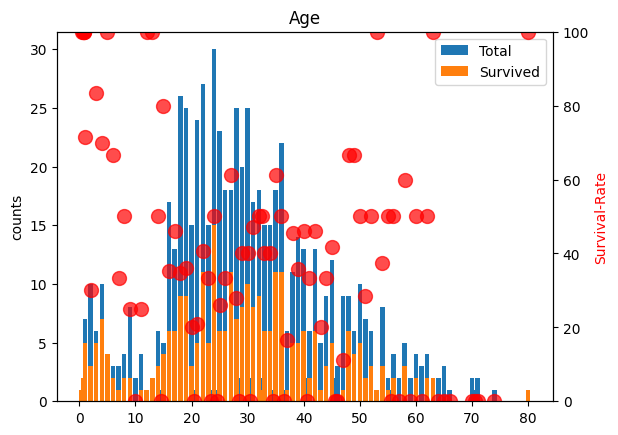

,count,sum,Surv_rate
Age,,,
0.42,1,1,100.0
0.67,1,1,100.0
0.75,2,2,100.0
0.83,2,2,100.0
0.92,1,1,100.0
...,...,...,...
70.00,2,0,0.0
70.50,1,0,0.0
71.00,2,0,0.0


In [7]:
plot_category('Age', train)

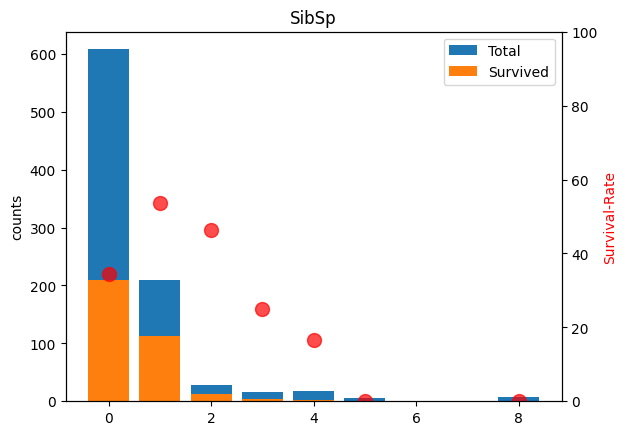

,count,sum,Surv_rate
SibSp,,,
0,608,210,34.539474
1,209,112,53.588517
2,28,13,46.428571
3,16,4,25.000000
4,18,3,16.666667
5,5,0,0.000000
8,7,0,0.000000


In [8]:
plot_category('SibSp', train)

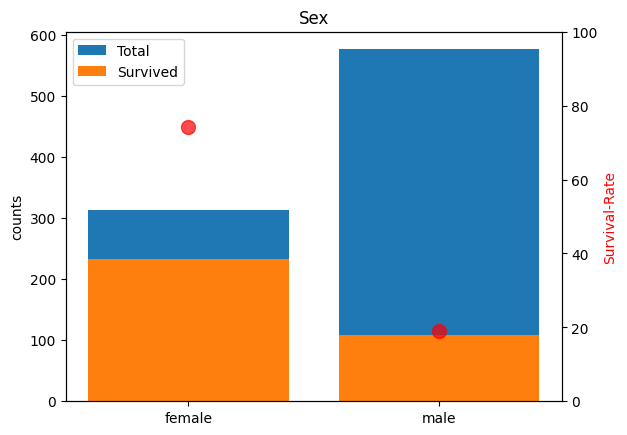

,count,sum,Surv_rate
Sex,,,
female,314,233,74.203822
male,577,109,18.890815


In [9]:
plot_category('Sex', train)

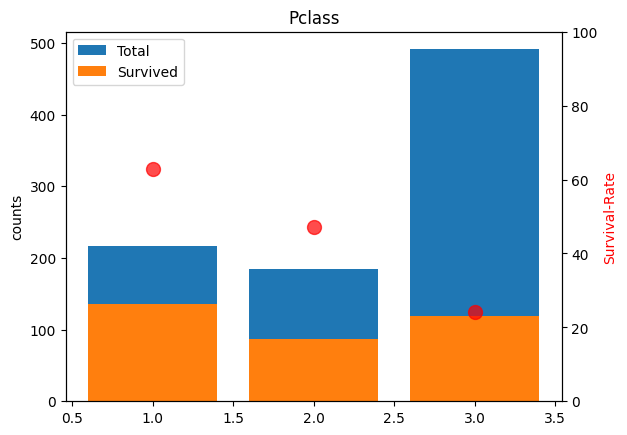

,count,sum,Surv_rate
Pclass,,,
1,216,136,62.962963
2,184,87,47.282609
3,491,119,24.236253


In [10]:
plot_category('Pclass', train)

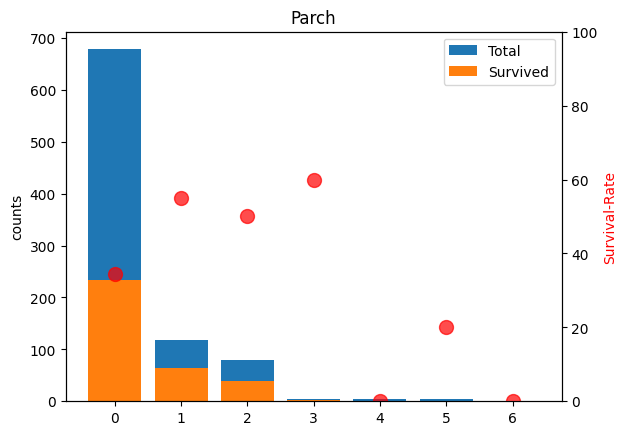

,count,sum,Surv_rate
Parch,,,
0,678,233,34.365782
1,118,65,55.084746
2,80,40,50.000000
3,5,3,60.000000
4,4,0,0.000000
5,5,1,20.000000
6,1,0,0.000000


In [11]:
plot_category('Parch', train)

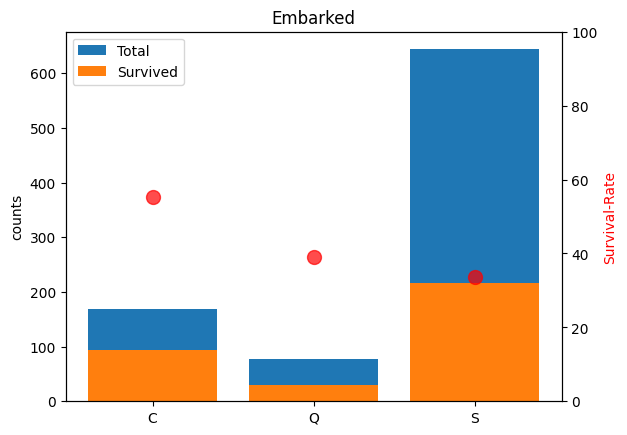

,count,sum,Surv_rate
Embarked,,,
C,168,93,55.357143
Q,77,30,38.961039
S,644,217,33.695652


In [12]:
plot_category('Embarked', train)

# Preprocessing

### Cabin

In [13]:
X_train['Cabin'] = X_train['Cabin'].fillna('no')
test['Cabin'] = test['Cabin'].fillna('no')

def preprocessing_Cabin(data):
    letter = []
    number = []
    for pos in data['Cabin']:
        pos = pos.split(' ')
        #print(pos)
        if len(pos) <2 and pos[-1] == 'no':
            letter.append('n')
            number.append(-1)
        
        elif len(pos) <2:
            let = pos[-1][0]
            num = pos[-1][1:]
            letter.append(let)
            if num == '':
                number.append(0)
            else:
                number.append(int(num))
        else:
            temp_let = []
            temp_num = []
            for temp_pos in pos:
                if temp_pos == 'F':
                    temp_let.append('F')
                    temp_num.append(0)
                else:
                    temp_let.append(temp_pos[0])
                    temp_num.append(int(temp_pos[1:]))
            if 'F' in temp_let:
                letter.append('F')
                number.append(0)
            else:
                letter.append(temp_let[-1])
                number.append(int(sum(temp_num) / len(temp_num)))

    data['Cabin_let'] = letter
    data['Cabin_num'] = number
    data = data.drop('Cabin', axis = 1)

    return data

X_train = preprocessing_Cabin(X_train)
test = preprocessing_Cabin(test)

### Marriage

In [14]:
def preprocessing_marriage(data):
    marriage =  [] 
    for name in data.Name:
        temp = name.split(' ')
        for t in temp:
            if t.endswith('.'):
                marr_temp = t
        marriage.append(marr_temp)
    data['marriage'] = marriage
    
    data['marriage'] = data['marriage'].replace(['Capt.', 'Col.', 'Countess.', 'Dr.', 'Jonkheer.', 'Major.', 'Rev.', 'Sir.'], 'Others')
    data['marriage'] = data['marriage'].replace(['Mlle.', 'Ms.', 'L.'], 'Miss.')
    data['marriage'] = data['marriage'].replace('Don.', 'Mr.')
    data['marriage'] = data['marriage'].replace(['Mme.', 'Lady.', 'Dona.'], 'Mrs.')

    data = data.drop('Name', axis = 1)
    
    return data

X_train = preprocessing_marriage(X_train)
test = preprocessing_marriage(test)


X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_let,Cabin_num,marriage
0,3,male,22.0,1,0,A/5 21171,7.2500,S,n,-1,Mr.
1,1,female,38.0,1,0,PC 17599,71.2833,C,C,85,Mrs.
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,n,-1,Miss.
3,1,female,35.0,1,0,113803,53.1000,S,C,123,Mrs.
4,3,male,35.0,0,0,373450,8.0500,S,n,-1,Mr.


## Ticket (Split Letter, Number)

In [15]:
##############################
def split_ticket(ticket):
    if not isinstance(ticket, str) or not ticket.strip():
        return "None", "0"  # Default values for empty tickets
    items = ticket.split()
    ticket_item = items[0] if len(items) > 1 else "None"
    ticket_number = items[-1]
    return ticket_item, ticket_number
    
X_train['Ticket_letter'], X_train['Ticket_number'] = zip(*X_train['Ticket'].apply(split_ticket))
test['Ticket_letter'], test['Ticket_number'] = zip(*test['Ticket'].apply(split_ticket))

X_train = X_train.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis =  1)

## Age (Fill Na)

In [16]:
# Fill Age depending on Marriage status (Repalce Nan w. Average value of same Marriage status)
age_marriage = X_train.groupby('marriage')['Age'].agg(['mean']).to_dict()
map_age_marriage = age_marriage['mean']


X_train['Age'].fillna(X_train.groupby('marriage')['Age'].transform('mean'), inplace = True)
X_train['Age'] = X_train['Age'].astype(int)

test['Age'] = test['Age'].fillna(test['marriage'].map(map_age_marriage))
test['Age'] = test['Age'].astype(int)

In [17]:
# 假设 x_train 是 DataFrame，包含 'marriage' 和 'Embarked' 列
# 按 'marriage' 分组，并统计 'Embarked' 中 S、C、Q 的占比
embarked_counts = X_train.groupby('marriage')['Embarked'].value_counts(normalize=True).unstack(fill_value=0)

# 只保留 S、C、Q 的占比
embarked_counts = embarked_counts[['S', 'C', 'Q']]

# 打印结果
print(embarked_counts)

Embarked         S         C         Q
marriage                              
Master.   0.775000  0.125000  0.100000
Miss.     0.600000  0.221622  0.178378
Mr.       0.766409  0.166023  0.067568
Mrs.      0.720000  0.256000  0.024000
Others    0.714286  0.190476  0.095238


### Sex (Mapping)

In [18]:
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

### Embarked (Fill 2 NA)

In [19]:
## Mode of X_train: S
##根据


X_train['Embarked'] = X_train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna(('S'))

## Etcetera

# add by xiazhijian  20250401

In [20]:
# 假设df是泰坦尼克号数据集
X_train['FamilySize'] = X_train['SibSp'] + X_train['Parch'] + 1  # 家庭总人数
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1  # 家庭总人数

X_train['IsAlone'] = (X_train['FamilySize'] == 1).astype(int)  # 是否独行
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)  # 是否独行
# 分箱家庭规模
X_train['FamilySizeGroup'] = pd.cut(
    X_train['FamilySize'],
    bins=[0, 1, 4, 11],
    labels=['Alone', 'SmallFamily', 'LargeFamily']
)



# 分箱家庭规模
test['FamilySizeGroup'] = pd.cut(
    test['FamilySize'],
    bins=[0, 1, 4, 11],
    labels=['Alone', 'SmallFamily', 'LargeFamily']
)

#sns.barplot(x='FamilySizeGroup', y='Survived', data=X_train)
# 查看生存率与家庭规模的关系
#print(X_train.groupby('FamilySizeGroup')['Survived'].mean())

# FareGroup

In [21]:
X_train['FareGroup'] = pd.qcut(X_train['Fare'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])
test['FareGroup'] = pd.qcut(test['Fare'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])

### Plot processed columns

In [22]:
print(X_train[['Age', 'Sex']].isnull().sum())
print(test[['Age', 'Sex']].isnull().sum())


# 确保 'Pclass' 是数值类型
X_train['Pclass'] = X_train['Pclass'].astype(int)
test['Pclass'] = test['Pclass'].astype(int)

# 重新运行交互特征生成
X_train['Age_Sex'] = X_train['Age'] * X_train['Sex']
test['Age_Sex'] = test['Age'] * test['Sex']

X_train['IsChild'] = (X_train['Age'] < 12).astype(int)
X_train['IsChild_Sex'] = X_train['IsChild'] * X_train['Sex']

test['IsChild'] = (test['Age'] < 12).astype(int)
test['IsChild_Sex'] = test['IsChild'] * test['Sex']

X_train['Age_Pclass'] = X_train['Age'] * X_train['Pclass']  # 现在可以正常运行
test['Age_Pclass'] = test['Age'] * test['Pclass']

Age    0
Sex    0
dtype: int64
Age    0
Sex    0
dtype: int64


begin 组合特征

In [23]:
# 分类特征需转换为字符串（避免热力图报错）
#category_cols = ['Pclass', 'Embarked', 'Cabin_let', 'marriage', 'Ticket_letter', 'Ticket_number', 'FamilySizeGroup', 'FareGroup']
#for col in category_cols:
#    X_train[col] = X_train[col].astype(str)

# 选择数值型特征

In [24]:
numeric_features = [
    'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_num', 
    'FamilySize', 'Age_Sex', 'IsChild', 'IsChild_Sex', 'Age_Pclass','IsAlone'
]

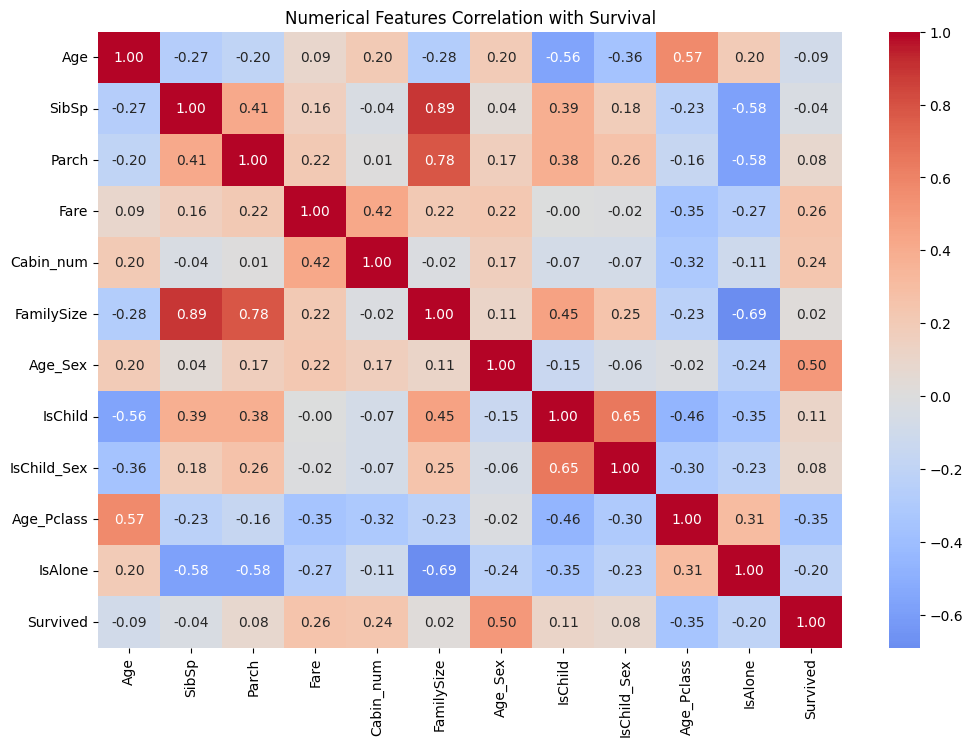

In [25]:
# 计算相关性

# 将y_train临时合并到X_train中计算
temp_df = X_train.copy()
temp_df['Survived'] = y_train  # 假设y_train是您的目标变量

corr_matrix = temp_df[numeric_features + ['Survived']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Numerical Features Correlation with Survival")
plt.show()


#热力图相关

# #非数值型相关

In [26]:
categorical_features1 = [
    'Pclass', 'Embarked', 'Cabin_let', 'marriage', 
    'Ticket_letter', 'Ticket_number', 'FamilySizeGroup', 'FareGroup'
]

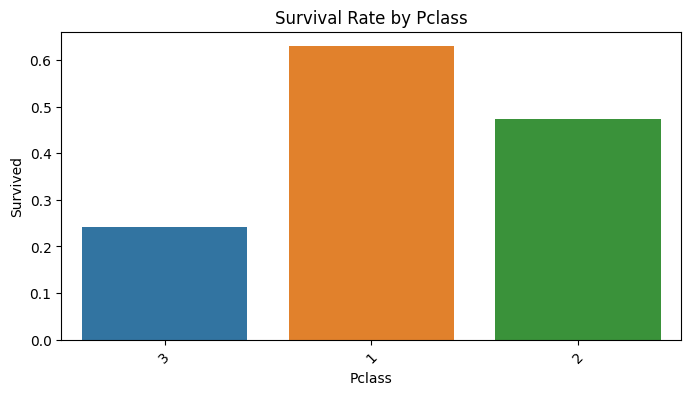

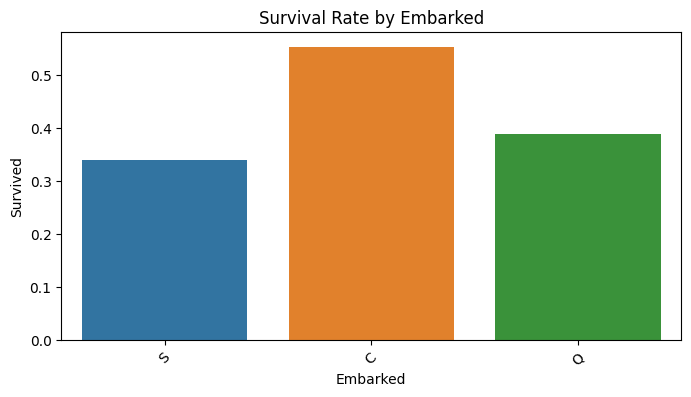

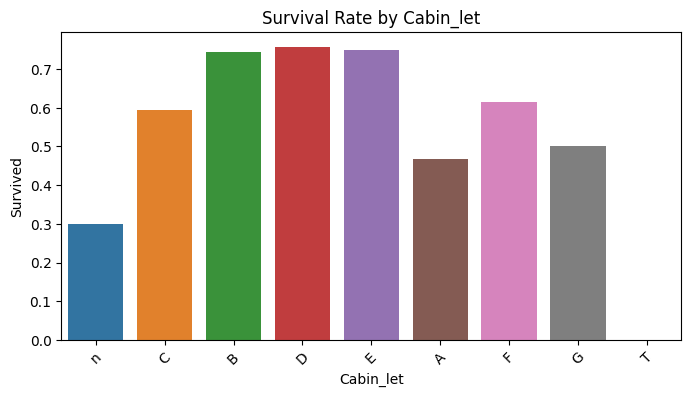

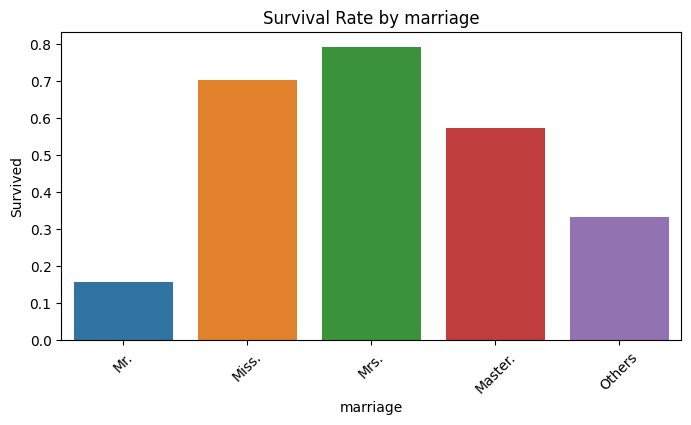

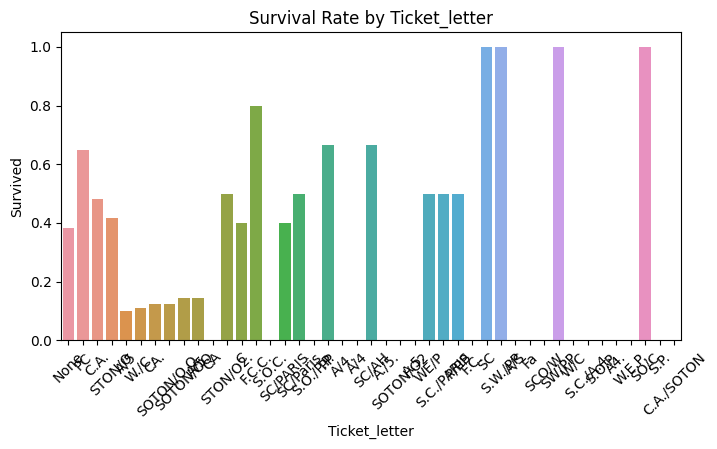

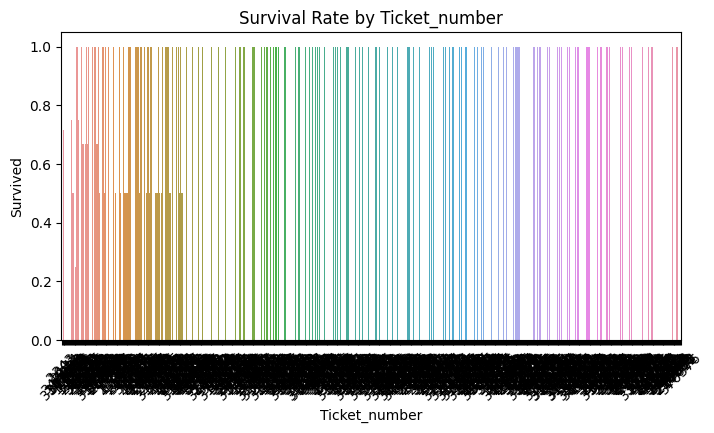

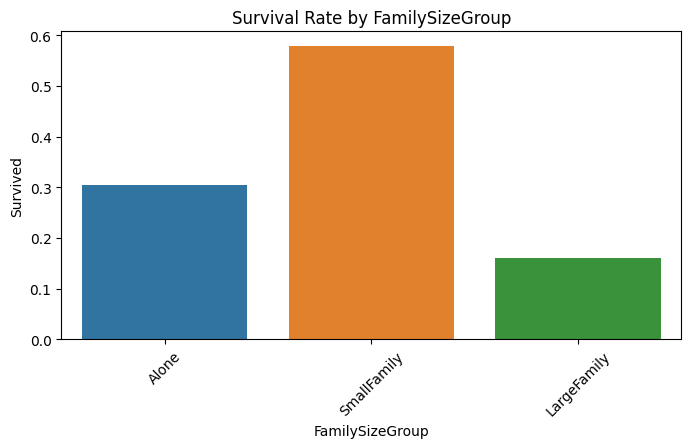

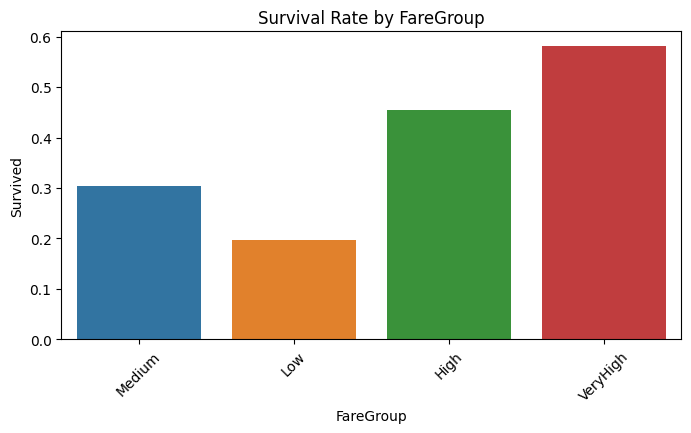

In [27]:
plot_data = X_train.copy()
plot_data['Survived'] = y_train.values  # 确保y_train是numpy数组或Series

for col in categorical_features1:
    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=col, 
        y='Survived', 
        data=plot_data, 
        ci=None, 
        order=plot_data[col].value_counts().index
    )
    plt.xticks(rotation=45)
    plt.title(f"Survival Rate by {col}")
    plt.show()

# 卡方检验

In [28]:
# 示例：对每个分类特征进行卡方检验
temp_df = X_train.copy()
temp_df['Survived'] = y_train

from scipy.stats import chi2_contingency

for col in categorical_features1:
    contingency_table = pd.crosstab(temp_df[col], temp_df['Survived'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{col}: Chi2 = {chi2:.1f}, p-value = {p:.3g}")

Pclass: Chi2 = 102.9, p-value = 4.55e-23
Embarked: Chi2 = 26.0, p-value = 2.3e-06
Cabin_let: Chi2 = 99.2, p-value = 6.33e-18
marriage: Chi2 = 290.0, p-value = 1.58e-61
Ticket_letter: Chi2 = 69.4, p-value = 0.00492
Ticket_number: Chi2 = 764.5, p-value = 0.0115
FamilySizeGroup: Chi2 = 74.5, p-value = 6.52e-17
FareGroup: Chi2 = 80.2, p-value = 2.82e-17


## Cramer's V系数

In [29]:
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(k-1, r-1))

for col in categorical_features1:
    contingency_table = pd.crosstab(temp_df[col], temp_df['Survived'])
    print(f"{col}: Cramer's V = {cramers_v(contingency_table):.3f}")

Pclass: Cramer's V = 0.340
Embarked: Cramer's V = 0.171
Cabin_let: Cramer's V = 0.334
marriage: Cramer's V = 0.570
Ticket_letter: Cramer's V = 0.279
Ticket_number: Cramer's V = 0.926
FamilySizeGroup: Cramer's V = 0.289
FareGroup: Cramer's V = 0.300


# 3.排列重要性

In [30]:
#from sklearn.inspection import permutation_importance

#result = permutation_importance(model_with, X_test, y_test, n_repeats=10)
#sorted_idx = result.importances_mean.argsort()[::-1]

#plt.barh(X_train.columns[sorted_idx], result.importances_mean[sorted_idx])
#plt.xlabel("Permutation Importance")

In [31]:
#X_train = X_train.drop(['FareGroup'], axis = 1)
#test = test.drop(['FareGroup'], axis = 1)

#0.824

X_train = X_train.drop(['IsAlone'], axis = 1)       #过拟合了
test = test.drop(['IsAlone'], axis = 1)
#0.839

#X_train = X_train.drop(['FamilySize'], axis = 1)       #反而贬低了
#test = test.drop(['FamilySize'], axis = 1)
#0.820

X_train = X_train.drop(['Age'], axis = 1)       
test = test.drop(['Age'], axis = 1)
#0.839

X_train = X_train.drop(['SibSp'], axis = 1)       
test = test.drop(['SibSp'], axis = 1)
#0.843


X_train = X_train.drop(['IsChild'], axis = 1)       
test = test.drop(['IsChild'], axis = 1)

X_train = X_train.drop(['IsChild_Sex'], axis = 1)       
test = test.drop(['IsChild_Sex'], axis = 1)


X_train = X_train.drop(['Parch'], axis = 1)       
test = test.drop(['Parch'], axis = 1)

X_train = X_train.drop(['Sex'], axis = 1)       
test = test.drop(['Sex'], axis = 1)

X_train = X_train.drop(['Embarked'], axis = 1)       
test = test.drop(['Embarked'], axis = 1)


In [32]:
X_train.info()
X_train.head()

print("test xiazhijian")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pclass           891 non-null    int64   
 1   Fare             891 non-null    float64 
 2   Cabin_let        891 non-null    object  
 3   Cabin_num        891 non-null    int64   
 4   marriage         891 non-null    object  
 5   Ticket_letter    891 non-null    object  
 6   Ticket_number    891 non-null    object  
 7   FamilySize       891 non-null    int64   
 8   FamilySizeGroup  891 non-null    category
 9   FareGroup        891 non-null    category
 10  Age_Sex          891 non-null    int64   
 11  Age_Pclass       891 non-null    int64   
dtypes: category(2), float64(1), int64(5), object(4)
memory usage: 71.8+ KB
test xiazhijian
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dt

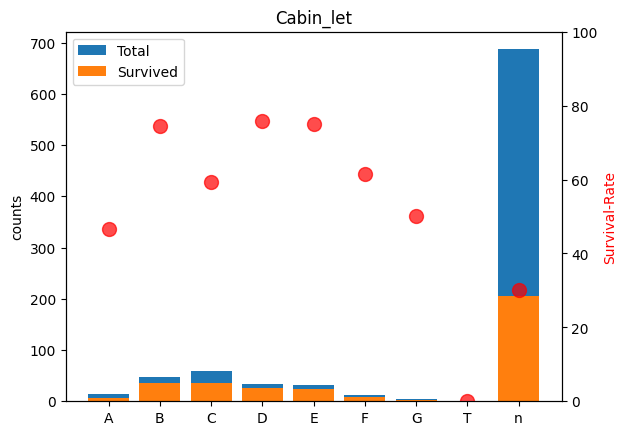

,count,sum,Surv_rate
Cabin_let,,,
A,15,7,46.666667
B,47,35,74.468085
C,59,35,59.322034
D,33,25,75.757576
E,32,24,75.000000
F,13,8,61.538462
G,4,2,50.000000
T,1,0,0.000000
n,687,206,29.985444


In [33]:
plot_category('Cabin_let', pd.concat([X_train, train['Survived']], axis = 1))

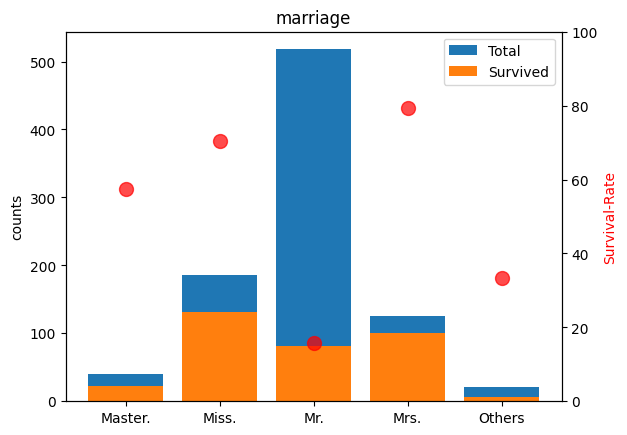

,count,sum,Surv_rate
marriage,,,
Master.,40,23,57.500000
Miss.,186,131,70.430108
Mr.,518,81,15.637066
Mrs.,126,100,79.365079
Others,21,7,33.333333


In [34]:
plot_category('marriage', pd.concat([X_train, train['Survived']], axis = 1))

### Fill Test dataset

In [35]:
for col in test.columns:
    if pd.api.types.is_categorical_dtype(test[col]):
        test[col] = test[col].astype(str)  # 先转成字符串，再填充
        test[col].fillna(test[col].mode()[0], inplace=True)
    elif test[col].dtype == 'object':
        test[col].fillna(test[col].mode()[0], inplace=True)
    elif np.issubdtype(test[col].dtype, np.integer):
        test[col].fillna(int(test[col].mean()), inplace=True)
    elif np.issubdtype(test[col].dtype, np.floating):
        test[col].fillna(test[col].mean(), inplace=True)

# Model

In [36]:
##### Temporary

# X_train = X_train.drop('Ticket', axis = 1)
# test = test.drop('Ticket', axis =  1)

###############

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pclass           891 non-null    int64   
 1   Fare             891 non-null    float64 
 2   Cabin_let        891 non-null    object  
 3   Cabin_num        891 non-null    int64   
 4   marriage         891 non-null    object  
 5   Ticket_letter    891 non-null    object  
 6   Ticket_number    891 non-null    object  
 7   FamilySize       891 non-null    int64   
 8   FamilySizeGroup  891 non-null    category
 9   FareGroup        891 non-null    category
 10  Age_Sex          891 non-null    int64   
 11  Age_Pclass       891 non-null    int64   
dtypes: category(2), float64(1), int64(5), object(4)
memory usage: 71.8+ KB


In [37]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [38]:
# X_train_ohe =  pd.get_dummies(X_train, dtype = int)
# test_ohe = pd.get_dummies(test, dtype = int)

#for col in ['Embarked', 'Cabin_let', 'marriage', 'Pclass', 'Ticket_letter', 'Ticket_number','FamilySizeGroup','FareGroup']:
for col in ['Cabin_let', 'marriage', 'Pclass', 'Ticket_letter', 'Ticket_number','FamilySizeGroup','FareGroup']:
    test[col] = test[col].astype('category')
    X_train[col] = X_train[col].astype('category')

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_train, y_train, random_state=42
)
X_train.info()
test.info()

print(X_train.isnull().sum())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pclass           891 non-null    category
 1   Fare             891 non-null    float64 
 2   Cabin_let        891 non-null    category
 3   Cabin_num        891 non-null    int64   
 4   marriage         891 non-null    category
 5   Ticket_letter    891 non-null    category
 6   Ticket_number    891 non-null    category
 7   FamilySize       891 non-null    int64   
 8   FamilySizeGroup  891 non-null    category
 9   FareGroup        891 non-null    category
 10  Age_Sex          891 non-null    int64   
 11  Age_Pclass       891 non-null    int64   
dtypes: category(7), float64(1), int64(4)
memory usage: 65.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------          

In [39]:
X_train_2.info()
X_train_2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 298 to 102
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pclass           668 non-null    category
 1   Fare             668 non-null    float64 
 2   Cabin_let        668 non-null    category
 3   Cabin_num        668 non-null    int64   
 4   marriage         668 non-null    category
 5   Ticket_letter    668 non-null    category
 6   Ticket_number    668 non-null    category
 7   FamilySize       668 non-null    int64   
 8   FamilySizeGroup  668 non-null    category
 9   FareGroup        668 non-null    category
 10  Age_Sex          668 non-null    int64   
 11  Age_Pclass       668 non-null    int64   
dtypes: category(7), float64(1), int64(4)
memory usage: 60.4 KB


,Pclass,Fare,Cabin_let,Cabin_num,marriage,Ticket_letter,Ticket_number,FamilySize,FamilySizeGroup,FareGroup,Age_Sex,Age_Pclass
298,1,30.5000,C,106,Mr.,None,19988,1,Alone,High,0,32
884,3,7.0500,n,-1,Mr.,SOTON/OQ,392076,1,Alone,Low,0,75
247,2,14.5000,n,-1,Mrs.,None,250649,3,SmallFamily,High,24,48
478,3,7.5208,n,-1,Mr.,None,350060,1,Alone,Low,0,66
305,1,151.5500,C,24,Master.,None,113781,4,SmallFamily,VeryHigh,0,0


## XGB 分类器

In [40]:
pipe = Pipeline([('preprocessing', None),
                 ('classifier', xgb.XGBClassifier())])



#param_grid_xgb = {'classifier': [xgb.XGBClassifier(enable_categorical = True, scale_pos_weight = 1, seed = 42)],
#                  'classifier__n_estimators': [35],
#                  'classifier__learning_rate': [0.19],
#                  'classifier__max_depth': [3],
#                  'classifier__gamma': [0.19],
#                  'classifier__min_child_weight': [5.8],
#                  'classifier__subsample': [1],
 #                 'classifier__colsample_bytree': [0.9]
 #                 }

param_grid_xgb = {'classifier': [xgb.XGBClassifier(enable_categorical = True, scale_pos_weight = 1, seed = 42)],
                  'classifier__n_estimators': [35, 40, 45],
                  'classifier__learning_rate': [0.17, 0.19, 0.2],
                  'classifier__max_depth': [3, 4, 5],
                  'classifier__gamma': [0.19, 0.2, 0.21],
                  'classifier__min_child_weight': [5.6, 5.7, 5.8],
                  'classifier__subsample': [1],
                  'classifier__colsample_bytree': [0.9, 0.925, 0.95]
                  }

grid_xgb = GridSearchCV(pipe, param_grid_xgb, cv=5, n_jobs=-1)

grid_xgb.fit(X_train_2, y_train_2)

print("###" + " Classification Report " + "###\n")
print(f"Best model: {grid_xgb.best_estimator_}\n")
print(f"Best model parameters: {grid_xgb.best_params_}\n")
print(f"Best model score: {grid_xgb.score(X_test_2, y_test_2):.3f}")

### Classification Report ###

Best model: Pipeline(steps=[('preprocessing', None),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.925, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=True, eval_metric=None,
                               feature_types=None, gamma=0.19, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=5.6, missing=nan,
                               monotone_co

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 1]
<class 'pandas.core.series.Series'>
0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64
Index(['Pclass', 'Fare', 'Cabin_let', 

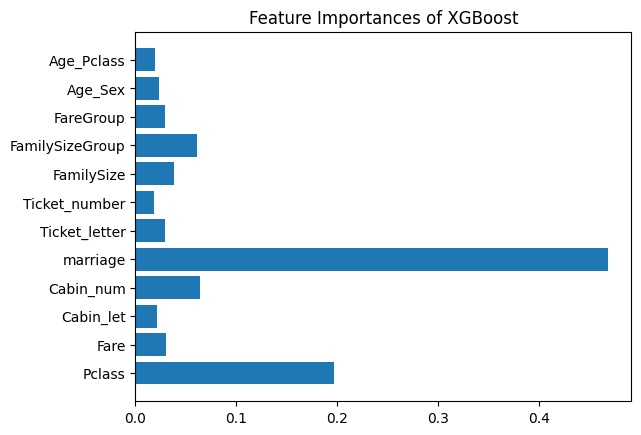

In [41]:
# 2. 使用最佳模型进行预测

#X_train.info()
#X_test_2.info()
#test.info()

#y_pred_test = grid_xgb.best_estimator_.predict(X_test_2)
y_pred_test_1 = grid_xgb.best_estimator_.predict(test)
#y_pred_test = best_model.predict_proba(test)[:,1]


## For report
print(y_pred_test_1)

print(type(test_id))  # 应该输出 <class 'pandas.core.series.Series'>
print(test_id.head()) # 检查前几行数据

print(X_test_2.columns )
#print(grid_xgb.best_estimator_.feature_names_in_ )


print(test_id.size)

print(y_pred_test_1.size)

#概率值
#proba_xgb_sub = grid_xgb.predict_proba(X_test_2)[:,1]

submission = pd.DataFrame({'PassengerId':test_id.values,'Survived':y_pred_test_1})

submission.to_csv('submission.csv', index=False)



grid_xgb.best_estimator_.steps[1][1].feature_importances_
cols = X_train.columns

plt.barh(cols, grid_xgb.best_estimator_.steps[1][1].feature_importances_)
plt.title('Feature Importances of XGBoost')
plt.show()






In [42]:
grid_xgb_original = pd.DataFrame(grid_xgb.cv_results_).sort_values('rank_test_score')

grid_xgb_report = pd.DataFrame(grid_xgb.cv_results_['params'])
grid_xgb_report['mean_test_score'] = grid_xgb.cv_results_['mean_test_score']
grid_xgb_report['rank_test_score'] = grid_xgb.cv_results_['rank_test_score']

grid_xgb_report

,classifier,classifier__colsample_bytree,classifier__gamma,classifier__learning_rate,classifier__max_depth,classifier__min_child_weight,classifier__n_estimators,classifier__subsample,mean_test_score,rank_test_score
0,"XGBClassifier(base_score=None, booster=None, c...",0.90,0.19,0.17,3,5.6,35,1,0.829346,4
1,"XGBClassifier(base_score=None, booster=None, c...",0.90,0.19,0.17,3,5.6,40,1,0.826349,95
2,"XGBClassifier(base_score=None, booster=None, c...",0.90,0.19,0.17,3,5.6,45,1,0.826349,95
3,"XGBClassifier(base_score=None, booster=None, c...",0.90,0.19,0.17,3,5.7,35,1,0.829335,7
4,"XGBClassifier(base_score=None, booster=None, c...",0.90,0.19,0.17,3,5.7,40,1,0.827842,45
...,...,...,...,...,...,...,...,...,...,...
724,"XGBClassifier(base_score=None, booster=None, c...",0.95,0.21,0.20,5,5.7,40,1,0.815902,690
725,"XGBClassifier(base_score=None, booster=None, c...",0.95,0.21,0.20,5,5.7,45,1,0.812905,728
726,"XGBClassifier(base_score=None, booster=None, c...",0.95,0.21,0.20,5,5.8,35,1,0.818876,592
727,"XGBClassifier(base_score=None, booster=None, c...",0.95,0.21,0.20,5,5.8,40,1,0.820368,479


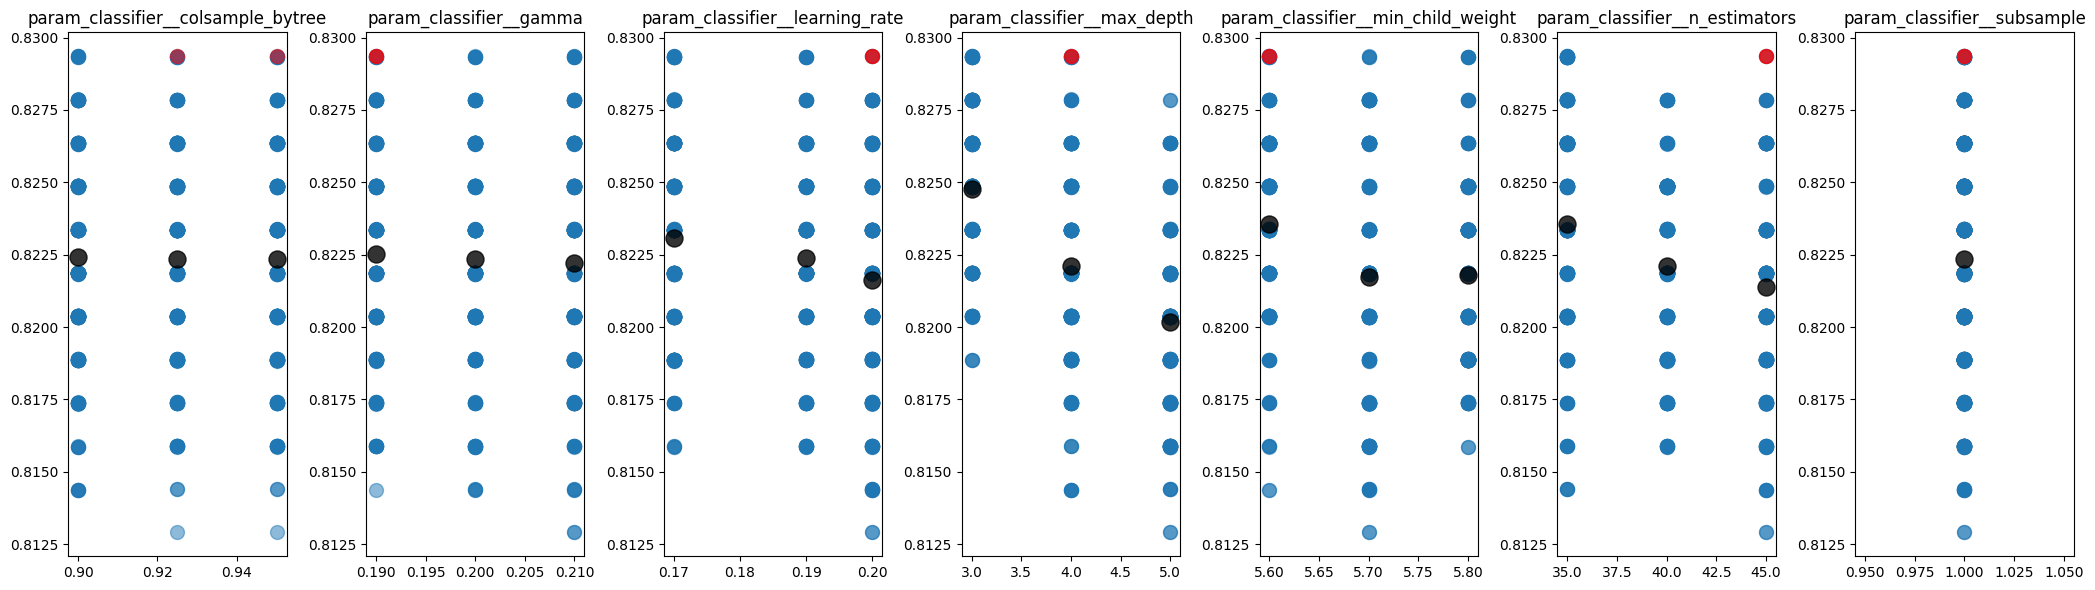

In [43]:
import matplotlib.pyplot as plt

def plot_grid_report(grid_report):
    params = [col for col in grid_report.columns if '__' in col]  # Extract hyperparameter names
    length = len(params)
    
    fig, axes = plt.subplots(1, length, figsize=(3*length, 6))

    # Ensure axes is always iterable
    if length == 1:
        axes = [axes]
    
    for i, param in enumerate(params):
        temp = grid_report.groupby(param)['mean_test_score'].agg('mean')

        ax = axes[i]  # Use the correct subplot reference
        ax.scatter(grid_report[param], grid_report['mean_test_score'], s = 100, alpha = 0.5,) 
        first_rank = grid_report[grid_report['rank_test_score'] == 1]
        ax.scatter(first_rank[param], first_rank['mean_test_score'], s = 100, alpha = 0.5, c = 'red')

        temp = grid_report.groupby(param)['mean_test_score'].agg('mean')
        ax.scatter(temp.index, temp.values, s = 150, c = 'black', alpha = 0.8)  
        ax.set_title(param)  # Set title for each parameter
    
    plt.tight_layout()  # Adjust layout for better visibility
    plt.show()

plot_grid_report(grid_xgb_original)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Pclass           891 non-null    category
 1   Fare             891 non-null    float64 
 2   Cabin_let        891 non-null    category
 3   Cabin_num        891 non-null    int64   
 4   marriage         891 non-null    category
 5   Ticket_letter    891 non-null    category
 6   Ticket_number    891 non-null    category
 7   FamilySize       891 non-null    int64   
 8   FamilySizeGroup  891 non-null    category
 9   FareGroup        891 non-null    category
 10  Age_Sex          891 non-null    int64   
 11  Age_Pclass       891 non-null    int64   
dtypes: category(7), float64(1), int64(4)
memory usage: 65.8 KB
